In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 6.1 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/0reho_lut_mean_ica.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/0reho_men_mean_ica.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/0reho_pr_mean_ica.csv'

Mounted at /content/drive


In [4]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20
file_name,,,,,,,,,,,,,,,,,,,,
reho_103515_01.nii.gz,0.140449,-0.032393,-0.023084,6.084014,0.174977,0.269586,0.022137,-0.154962,-0.125076,-0.143837,0.013641,0.136032,-0.098027,-0.059103,-0.069409,0.045958,0.044159,0.069716,-0.177127,0.023929
reho_103515_02.nii.gz,0.197698,-0.141560,0.124766,4.934928,0.126078,0.125663,-0.071893,-0.151455,-0.098599,-0.183183,-0.198944,0.125929,-0.137928,-0.077600,-0.125910,0.201852,0.166719,0.158679,-0.021255,0.199963
reho_103515_03.nii.gz,0.110326,-0.067935,0.181313,5.098306,0.063087,0.002565,-0.111688,-0.038962,-0.035074,-0.090834,-0.252031,0.077164,-0.090703,-0.101703,-0.055421,0.163868,0.125710,0.041433,0.013443,0.099623
reho_104820_01.nii.gz,-0.408654,-1.297344,0.342317,-0.322947,0.266123,0.650662,-0.078705,-0.264963,-0.650711,-0.191674,-0.500122,0.599433,-0.297072,-1.350430,-0.354618,0.399885,-0.089531,-0.096081,-0.399230,0.492437
reho_104820_02.nii.gz,-0.291415,-1.250183,0.305347,-0.342623,0.217813,0.551281,-0.161162,-0.341780,-0.638465,-0.167678,-0.501698,0.546090,-0.308965,-1.207164,-0.351709,0.382942,-0.081091,-0.061567,-0.471598,0.474656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_809252_02.nii.gz,0.371139,-0.407632,0.767685,0.069330,0.447314,-0.526707,-0.651980,-0.591092,-0.314592,-0.150015,-0.245004,-0.032795,-0.389993,-0.754954,-0.733256,-0.015880,0.474989,0.564963,-1.127930,0.360617
reho_809252_03.nii.gz,0.444104,-0.358694,0.689020,0.096769,0.422648,-0.490087,-0.708348,-0.604271,-0.315735,-0.174357,-0.258649,-0.031783,-0.392985,-0.747513,-0.728652,-0.046108,0.520117,0.599393,-1.121799,0.289482
reho_822244_01.nii.gz,0.079296,-0.076090,0.102079,-0.077052,0.153832,0.061141,-0.049692,-0.088099,-0.066583,-0.062177,5.584929,0.114652,-0.063245,-0.058713,-0.051801,0.050069,0.053960,0.005919,-0.044793,0.075061


In [5]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20
file_name,,,,,,,,,,,,,,,,,,,,
reho_114823_01.nii.gz,4.657865,0.257510,0.133604,0.108438,0.089914,0.089712,0.094052,-0.199588,-0.325190,0.142274,-0.243380,0.143503,-0.002056,-0.041901,-0.174430,-0.127628,0.278899,-0.236251,-0.054751,0.197417
reho_114823_02.nii.gz,4.889143,0.094721,0.080902,-0.048117,0.161001,0.080184,0.178554,-0.101872,-0.065443,0.143111,-0.068395,0.120779,-0.211461,-0.085827,-0.164013,-0.026674,0.166930,-0.044058,-0.045280,0.125849
reho_114823_03.nii.gz,4.310421,0.236241,0.154798,0.084611,0.142636,0.104790,0.215213,-0.163222,-0.190857,0.147182,-0.144693,0.123910,-0.255650,0.038682,-0.258665,-0.272966,0.185602,-0.220343,-0.177461,0.098389
reho_117122_01.nii.gz,-0.099688,0.113727,0.182266,0.043808,-3.868450,0.250334,0.185738,-0.200804,-0.116990,0.170716,-0.237675,0.101428,-0.242227,0.209467,-0.131043,-0.213968,0.092769,-0.182840,-0.105408,0.031462
reho_117122_02.nii.gz,-0.072831,0.056364,0.090409,0.073023,-4.975556,0.111188,0.151643,-0.061344,-0.015939,0.106855,-0.125893,0.109876,-0.205964,0.086326,-0.267343,-0.141224,0.017360,-0.110044,-0.030999,0.020193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_861456_02.nii.gz,0.092551,0.189973,0.133804,-0.052404,0.221865,0.273844,0.085260,-0.217507,-0.226581,0.371272,-0.293780,0.203409,-0.169182,0.192688,-0.086100,4.303318,0.106635,-0.248162,-0.164785,0.136936
reho_861456_03.nii.gz,-0.191977,-0.042373,0.092659,0.015198,0.102006,-0.098419,0.168248,0.015831,0.051129,-0.284452,0.096214,0.045827,-0.193077,0.004342,-0.275670,6.027239,0.163589,0.183953,-0.009083,0.125599
reho_902242_01.nii.gz,-0.140858,0.209876,0.068898,0.053372,-0.061871,0.067266,0.145234,0.054376,-0.079754,0.012047,-0.016326,-0.331946,-0.087724,-0.149273,-0.145748,-0.043233,-6.077921,-0.124070,-0.033677,0.153435


In [6]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,ica_1,ica_2,ica_3,ica_4,ica_5,ica_6,ica_7,ica_8,ica_9,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19,ica_20
file_name,,,,,,,,,,,,,,,,,,,,
reho_101915_01.nii.gz,-0.364727,-0.674815,-0.320280,-0.514687,0.102726,-0.055868,-0.287093,0.505686,0.281005,-0.416780,-0.581550,-0.094724,0.393566,-0.562742,-0.397225,-2.895780,0.184748,0.496199,-0.097476,-0.389582
reho_101915_02.nii.gz,-0.361631,-0.787535,-0.136304,-0.254771,-0.052221,0.029955,-0.450011,0.567269,0.259772,-0.347647,-0.249225,-0.034920,0.055896,-0.403082,-0.168945,-3.592909,0.461838,0.574749,-0.298458,-0.219681
reho_101915_03.nii.gz,-0.333050,-0.942889,-0.195641,-0.004286,-0.106771,-0.232318,-0.509558,1.035130,0.123464,-0.254327,0.153356,0.567733,-0.363161,-0.000242,0.244121,-6.474221,1.102934,1.074157,-0.673508,-0.219427
reho_128632_01.nii.gz,-0.020807,0.210365,-0.105853,-0.354652,0.098268,-0.032218,-0.034400,-0.092046,-0.022249,-0.200788,-0.351815,-0.068214,0.270725,5.709087,-0.339795,0.047329,-0.037759,0.181937,0.115113,0.163769
reho_128632_02.nii.gz,-0.077768,-0.261963,0.251483,0.034286,0.005961,0.160831,0.016269,-0.214339,0.153729,-0.150904,0.058591,0.002835,0.116702,5.336937,-0.037493,0.191022,-0.057133,0.098426,0.384553,0.325146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_987983_02.nii.gz,0.138805,-0.073142,-0.131049,-0.161833,-5.609569,0.149210,0.065426,-0.095799,0.055611,-0.151021,-0.188851,-0.136263,0.154254,-0.118148,-0.175561,0.105937,-0.087883,0.176669,0.004902,-0.138759
reho_987983_03.nii.gz,0.091966,-0.172124,-0.023589,-0.111728,-5.606787,0.159726,0.124820,-0.142129,0.097007,-0.100763,-0.136507,-0.005083,0.110869,-0.192839,-0.115259,0.055463,-0.116442,0.228987,0.114429,0.005754
reho_993675_01.nii.gz,0.096863,0.467679,-0.324100,-0.331880,0.087733,0.152056,0.466562,-0.434437,0.185411,-0.520111,-0.162185,-1.582080,0.478050,-0.454852,-0.455115,0.097260,0.383193,0.066812,-0.888373,0.548587


In [7]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 19*3 #int(len(data_men)*0.7)
prlof = 30*3 #int(len(data_pr)*0.7)
lut = 19*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = 'menstrual'
data_pr['group'] = 'proliferativo'
data_lut['group'] = 'luteo'


# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 204 muestras
Conjunto de testeo: 78 muestras


In [8]:
print(X_train, y_train)
print(X_test, y_test)

        ica_1     ica_2     ica_3     ica_4     ica_5     ica_6     ica_7  \
0    4.657865  0.257510  0.133604  0.108438  0.089914  0.089712  0.094052   
1    4.889143  0.094721  0.080902 -0.048117  0.161001  0.080184  0.178554   
2    4.310421  0.236241  0.154798  0.084611  0.142636  0.104790  0.215213   
3   -0.099688  0.113727  0.182266  0.043808 -3.868450  0.250334  0.185738   
4   -0.072831  0.056364  0.090409  0.073023 -4.975556  0.111188  0.151643   
..        ...       ...       ...       ...       ...       ...       ...   
199  0.115052  0.310558  0.617005 -0.140610  0.247665 -0.036902 -0.644458   
200  0.145913  0.324321  0.609059 -0.075221  0.253361 -0.101359 -0.710465   
201  0.080706  0.034097  0.118680 -0.139915 -5.446807  0.081549 -0.048518   
202  0.114554 -0.086353  0.076134 -0.124008 -5.236482  0.025538 -0.106223   
203  0.220144 -0.214065  0.183534 -0.110470 -5.520374  0.090879 -0.022974   

        ica_8     ica_9    ica_10    ica_11    ica_12    ica_13    ica_14  

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 4.55173794e+00  3.30779766e-01  1.40617371e-01 ... -2.77918982e-01
  -1.50868017e-01  2.22265926e-01]
 [ 4.77426860e+00  1.53394914e-01  8.61155297e-02 ... -7.57624790e-02
  -1.41377727e-01  1.47980793e-01]
 [ 4.21743571e+00  3.07603580e-01  1.62536192e-01 ... -2.61186423e-01
  -2.73820335e-01  1.19477818e-01]
 ...
 [ 1.47707218e-01  8.73349749e-02  1.25183982e-01 ...  4.62073088e-02
  -1.32686766e-01 -2.24263037e-03]
 [ 1.80275228e-01 -4.39138626e-02  8.11847470e-02 ...  9.76446241e-02
  -2.40286781e-01  7.26774603e-02]
 [ 2.81870888e-01 -1.83077188e-01  1.92253793e-01 ...  5.76940238e-02
  -1.27200017e-01  2.52554603e-01]]


In [10]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0    4.551738  0.330780  0.140617  0.048024  0.093792  0.142849  0.090537   
1    4.774269  0.153395  0.086116 -0.086338  0.172622  0.133455  0.164381   
2    4.217436  0.307604  0.162536  0.027575  0.152258  0.157718  0.196415   
3   -0.025864  0.174105  0.190942 -0.007444 -4.295733  0.301238  0.170658   
4   -0.000022  0.111598  0.095947  0.017629 -5.523428  0.164027  0.140864   
..        ...       ...       ...       ...       ...       ...       ...   
199  0.180754  0.388584  0.640534 -0.165719  0.268727  0.017997 -0.554813   
200  0.210448  0.403581  0.632317 -0.109600  0.275042 -0.045563 -0.612494   
201  0.147707  0.087335  0.125184 -0.165123 -6.046011  0.134801 -0.034048   
202  0.180275 -0.043914  0.081185 -0.151471 -5.812776  0.079568 -0.084473   
203  0.281871 -0.183077  0.192254 -0.139852 -6.127590  0.144001 -0.011726   

           7         8         9         10        11        12        13  

In [11]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

print(grupo_1_indices)
print(grupo_2_indices)
print(grupo_3_indices)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]
[ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146]
[147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203]
Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0   4.551738  0.330780  0.140617  0.048024  0.093792  0.142849  0.090537   
1   4.774269  0.153395  0.086116 -0.086338  0.17262

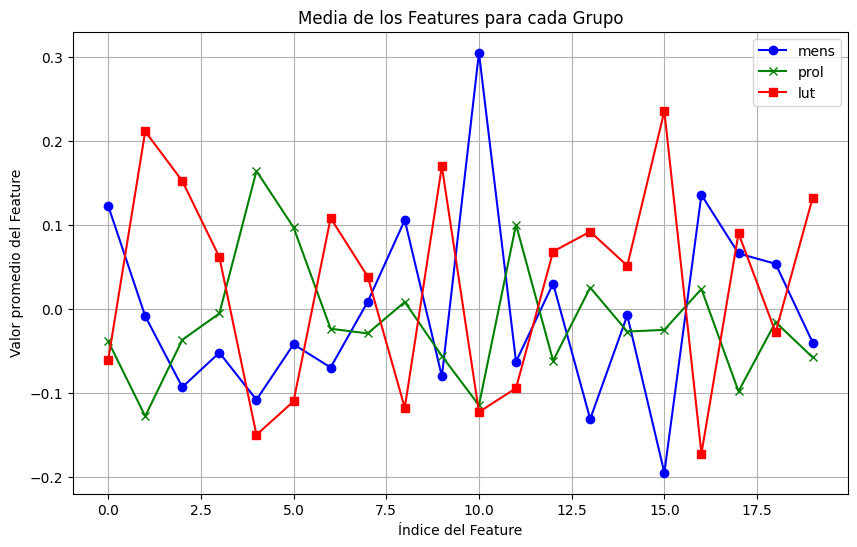

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



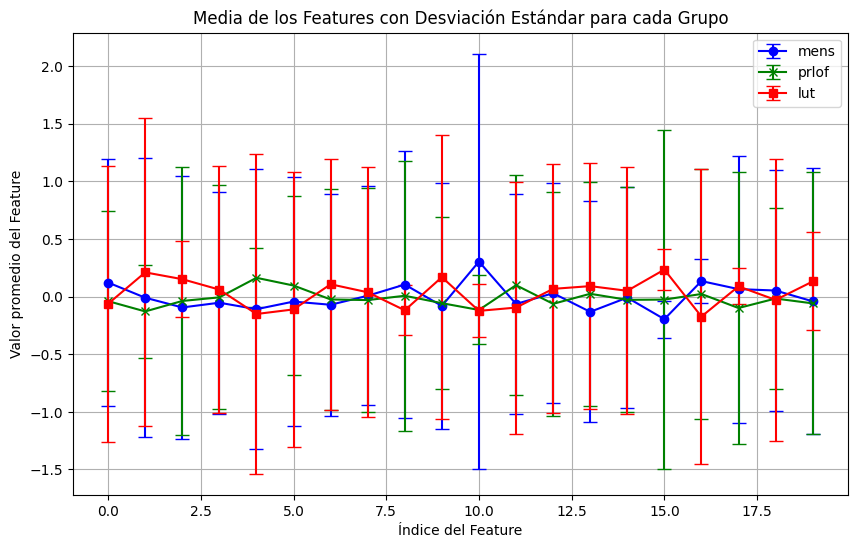

In [13]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='lut', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


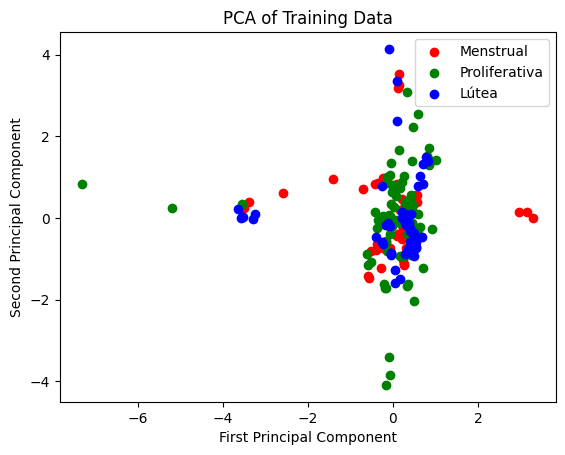

In [14]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [15]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [16]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [17]:
metrics.accuracy_score(y_test, y_predict)

0.20512820512820512

In [18]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.34615384615384615


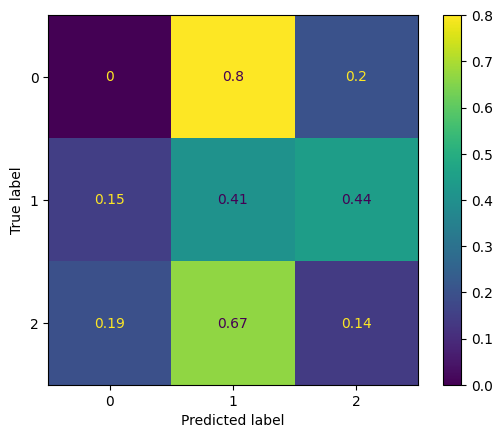

In [19]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

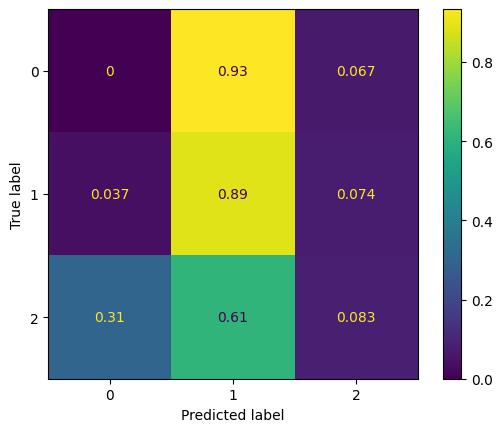

In [20]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [21]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.3333333333333333


In [22]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.358974358974359


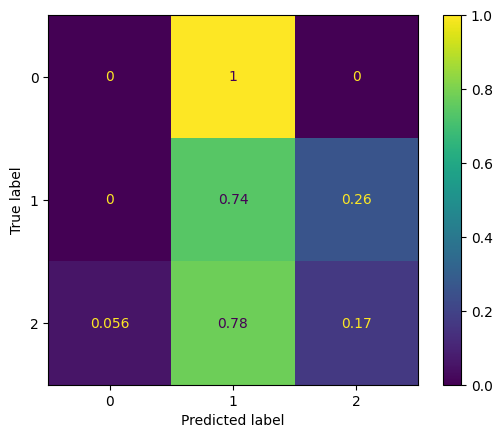

In [23]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

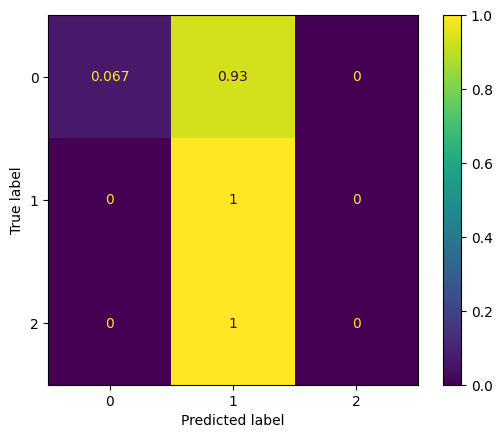

In [24]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

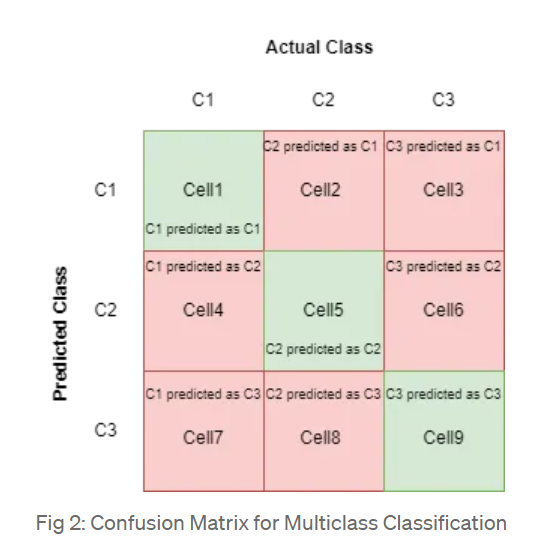

In [25]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [26]:
print(X, y)

        ica_1     ica_2     ica_3     ica_4     ica_5     ica_6     ica_7  \
0    4.657865  0.257510  0.133604  0.108438  0.089914  0.089712  0.094052   
1    4.889143  0.094721  0.080902 -0.048117  0.161001  0.080184  0.178554   
2    4.310421  0.236241  0.154798  0.084611  0.142636  0.104790  0.215213   
3   -0.099688  0.113727  0.182266  0.043808 -3.868450  0.250334  0.185738   
4   -0.072831  0.056364  0.090409  0.073023 -4.975556  0.111188  0.151643   
..        ...       ...       ...       ...       ...       ...       ...   
277  0.371139 -0.407632  0.767685  0.069330  0.447314 -0.526707 -0.651980   
278  0.444104 -0.358694  0.689020  0.096769  0.422648 -0.490087 -0.708348   
279  0.079296 -0.076090  0.102079 -0.077052  0.153832  0.061141 -0.049692   
280  0.124684 -0.118128  0.140856 -0.173868  0.155786  0.132076 -0.019975   
281  0.171402 -0.167071  0.078854 -0.149424  0.122226  0.132784 -0.064136   

        ica_8     ica_9    ica_10    ica_11    ica_12    ica_13    ica_14  

              precision    recall  f1-score   support

           0       0.33      0.20      0.25        15
           1       0.68      0.70      0.69        27
           2       0.59      0.67      0.62        36

    accuracy                           0.59        78
   macro avg       0.53      0.52      0.52        78
weighted avg       0.57      0.59      0.57        78

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.81      0.78      0.79        27
           2       0.90      0.78      0.84        36

    accuracy                           0.82        78
   macro avg       0.81      0.85      0.82        78
weighted avg       0.83      0.82      0.82        78

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.78      0.78      0.78        27
           2       0.74      0.78      0.76        36

    accuracy        

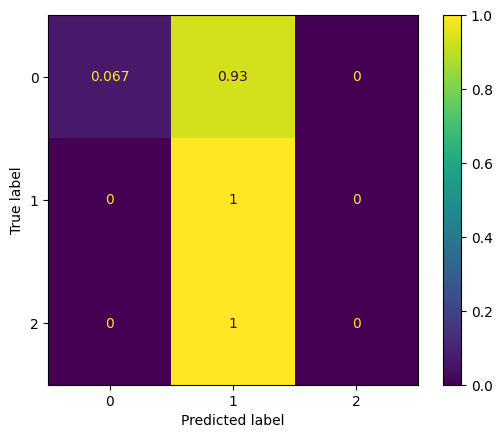

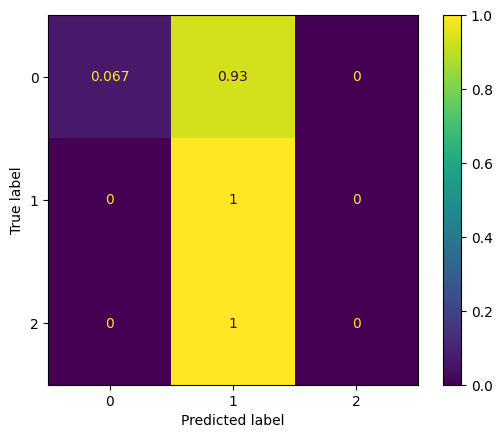

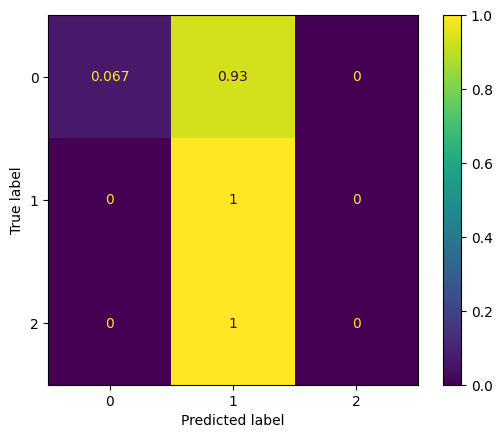

In [27]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [28]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.10526316, 0.15789474, 0.32142857, 0.16071429, 0.125     ])

In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.17 accuracy with a standard deviation of 0.08


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.82      1.00      0.90        27
           2       1.00      0.86      0.93        36

    accuracy                           0.92        78
   macro avg       0.94      0.93      0.93        78
weighted avg       0.94      0.92      0.92        78



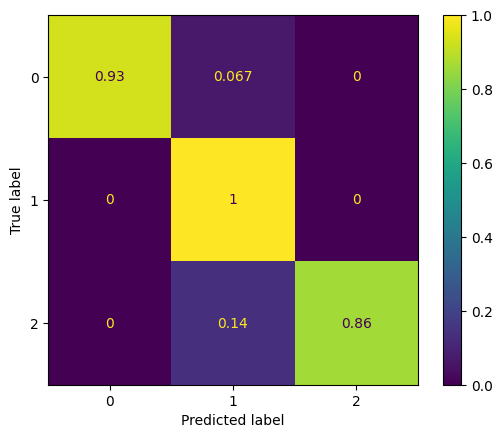

In [32]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [33]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

   Feature  Importance
12  ica_13    0.130972
15  ica_16    0.106796
11  ica_12    0.088091
8    ica_9    0.067648
6    ica_7    0.066829
17  ica_18    0.066428
0    ica_1    0.064540
9   ica_10    0.063097
7    ica_8    0.050168
18  ica_19    0.044766
